   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

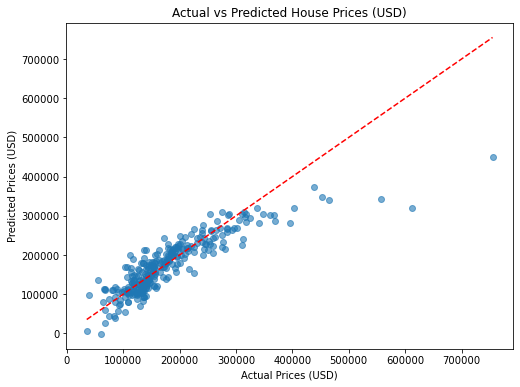

In [27]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
# Update the file path to the location of your dataset
data_path = "C:/Users/harsh/OneDrive/Desktop/Projects/Internship Projects/SkillBit/House Prediction(6)/Dataset/train.csv"  # Adjust path as necessary
data = pd.read_csv(data_path)

# Step 3: Data Exploration
# Display first few rows of the dataset
print(data.head())

# Step 4: Feature Selection (Choose Relevant Columns)
features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
target = 'SalePrice'

# Extract features and target variable
X = data[features]
y = data[target]

# Step 5: Handle Missing Values
X = X.fillna(X.median())

# Step 6: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Choose a Model (Linear Regression or Decision Tree)
# Linear Regression
model = LinearRegression()

# Alternatively, you can use Decision Tree Regressor
# model = DecisionTreeRegressor(random_state=42)

# Step 8: Train the Model
model.fit(X_train, y_train)

# Step 9: Make Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

usd_to_inr = 83.0  # Conversion rate: 1 USD = 83 INR (can vary over time)
y_pred_inr = y_pred * usd_to_inr

# Step 12: Create a DataFrame with Actual vs Predicted Prices
results = pd.DataFrame({
    'Actual Price (USD)': y_test,
    'Predicted Price (USD)': y_pred,
    'Predicted Price (INR)': y_pred_inr
})

# Step 13: Format INR Prices (Make them more readable)
results['Predicted Price (INR)'] = results['Predicted Price (INR)'].apply(lambda x: "{:,.2f}".format(x))

# Display Top 10 Predictions
print("\nTop 10 Predicted House Prices:")
print(results.head(10).to_string(index=False))


# Step 13: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices (USD)")
plt.ylabel("Predicted Prices (USD)")
plt.title("Actual vs Predicted House Prices (USD)")
plt.show()

# Step 14: Feature Importance (if using Decision Tree)
if isinstance(model, DecisionTreeRegressor):
    feature_importance = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_df)